In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import truncnorm
from scipy.optimize import curve_fit

In [2]:
df= pd.read_csv('rechit_features_with_target.csv')

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error
from scipy.stats import truncnorm
from scipy.optimize import curve_fit

In [4]:
X = df.drop(['target_energy'], axis=1)
y = df['target_energy']

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 1: Split into temp (train+val) and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split temp into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [6]:
# class SimpleDNN(nn.Module):
#     def __init__(self, input_dim):
#         super(SimpleDNN, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 64)  # First hidden layer
#         self.fc2 = nn.Linear(64, 64)         # Second hidden layer
#         self.out = nn.Linear(64, 1)          # Output layer for regression

#     def forward(self, x):
#         x = F.relu(self.fc1(x))  # First layer with ReLU
#         x = F.relu(self.fc2(x))  # Second layer with ReLU
#         x = self.out(x)          # Output (no activation for regression)
#         return x

In [7]:
# import torch.nn as nn
# import torch.nn.functional as F

# class SimpleDNN(nn.Module):
#     def __init__(self, input_dim):
#         super(SimpleDNN, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 128)   # Was 64
#         self.fc2 = nn.Linear(128, 128)         # Was 64
#         self.fc3 = nn.Linear(128, 128)         # New third hidden layer
#         self.out = nn.Linear(128, 1)           # Output layer

#     def forward(self, x):
#         x = F.relu(self.fc1(x))   # Layer 1
#         x = F.relu(self.fc2(x))   # Layer 2
#         x = F.relu(self.fc3(x))   # Layer 3 (new)
#         x = self.out(x)           # Output
#         return x


In [8]:
# # Example input dimension
# input_dim = X_train.shape[1]  # if X_train is a NumPy array

# # Create model
# model = SimpleDNN(input_dim=input_dim)
# # model = ComplexDNN(input_dim)

# # Define loss and optimizer
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [9]:
# # Convert DataFrame to tensor
# X_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# y_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # shape [N, 1]

# # Wrap into Dataset and DataLoader
# from torch.utils.data import TensorDataset, DataLoader

# train_dataset = TensorDataset(X_tensor, y_tensor)
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [10]:
# num_epochs = 100
# model.train()

# for epoch in range(num_epochs):
#     for batch_X, batch_y in train_loader:
#         # Forward pass
#         outputs = model(batch_X)
#         loss = criterion(outputs, batch_y)

#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

In [11]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils.data import TensorDataset, DataLoader

# # Select device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # Initialize model and move to device
# input_dim = X_train.shape[1]
# model = SimpleDNN(input_dim=input_dim).to(device)

# # Loss and optimizer
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# # Convert DataFrame to tensor and move to device
# X_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
# y_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1).to(device)

# # Dataset and DataLoader
# train_dataset = TensorDataset(X_tensor, y_tensor)
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# # Training loop
# num_epochs = 100
# model.train()

# for epoch in range(num_epochs):
#     for batch_X, batch_y in train_loader:
#         # No need to move batch_X, batch_y to device again; already done
#         outputs = model(batch_X)
#         loss = criterion(outputs, batch_y)

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define model
# class SimpleDNN(nn.Module):
#     def __init__(self, input_dim):
#         super(SimpleDNN, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 64)
#         self.fc2 = nn.Linear(64, 64)
#         self.out = nn.Linear(64, 1)

#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         return self.out(x)

# class SimpleDNN(nn.Module):
#     def __init__(self, input_dim):
#         super(SimpleDNN, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 32)   # Was 64
#         self.fc2 = nn.Linear(32, 64)         # Was 64
#         self.fc3 = nn.Linear(64, 64)         # New third hidden layer
#         self.out = nn.Linear(64, 1)           # Output layer

#     def forward(self, x):
#         x = F.relu(self.fc1(x))   # Layer 1
#         x = F.relu(self.fc2(x))   # Layer 2
#         x = F.relu(self.fc3(x))   # Layer 3 (new)
#         x = self.out(x)           # Output
#         return x

# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class SimpleDNN(nn.Module):
#     def __init__(self, input_dim, dropout_prob=0.2):
#         super(SimpleDNN, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 64)
#         self.fc2 = nn.Linear(64, 128)
#         self.fc3 = nn.Linear(128, 128)
#         self.fc4 = nn.Linear(128, 64)
#         self.out = nn.Linear(64, 1)
#         # self.dropout = nn.Dropout(dropout_prob)

#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         # x = self.dropout(x)           # Dropout after second hidden layer
#         x = F.relu(self.fc3(x))
#         # x = self.dropout(x)           # Dropout after third hidden layer
#         x = F.relu(self.fc4(x))
#         x = self.out(x)
#         return x


# class SimpleDNN(nn.Module):
#     def __init__(self, input_dim, dropout_prob=0.2):
#         super(SimpleDNN, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 64)
#         self.bn1 = nn.BatchNorm1d(64)

#         self.fc2 = nn.Linear(64, 128)
#         self.bn2 = nn.BatchNorm1d(128)

#         self.fc3 = nn.Linear(128, 128)
#         self.bn3 = nn.BatchNorm1d(128)

#         self.fc4 = nn.Linear(128, 64)
#         self.bn4 = nn.BatchNorm1d(64)

#         self.out = nn.Linear(64, 1)
#         # self.dropout = nn.Dropout(dropout_prob)

#     def forward(self, x):
#         x = F.relu(self.bn1(self.fc1(x)))
#         x = F.relu(self.bn2(self.fc2(x)))
#         # x = self.dropout(x)
#         x = F.relu(self.bn3(self.fc3(x)))
#         # x = self.dropout(x)
#         x = F.relu(self.bn4(self.fc4(x)))
#         x = self.out(x)
#         return x

class SimpleDNN(nn.Module):
    def __init__(self, input_dim, dropout_prob=0.2):
        super(SimpleDNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 1)
        # self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # x = self.dropout(x)
        x = F.relu(self.fc3(x))
        # x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.out(x)
        return x



# class IdealDNN(nn.Module):
#     def __init__(self, input_dim, dropout_prob=0.3):
#         super(IdealDNN, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 128)
#         self.bn1 = nn.BatchNorm1d(128)

#         self.fc2 = nn.Linear(128, 256)
#         self.bn2 = nn.BatchNorm1d(256)

#         self.fc3 = nn.Linear(256, 256)
#         self.bn3 = nn.BatchNorm1d(256)

#         self.fc4 = nn.Linear(256, 128)
#         self.bn4 = nn.BatchNorm1d(128)

#         self.out = nn.Linear(128, 1)

#         self.dropout = nn.Dropout(dropout_prob)

#     def forward(self, x):
#         x = F.relu(self.bn1(self.fc1(x)))
#         x = self.dropout(x)

#         x = F.relu(self.bn2(self.fc2(x)))
#         x = self.dropout(x)

#         x = F.relu(self.bn3(self.fc3(x)))
#         x = self.dropout(x)

#         x = F.relu(self.bn4(self.fc4(x)))
#         x = self.dropout(x)

#         x = self.out(x)
#         return x



# Prepare data
# X_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# y_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

# dataset = TensorDataset(X_tensor, y_tensor)

# train_size = int(0.8 * len(dataset))
# val_size = len(dataset) - train_size
# train_ds, val_ds = random_split(dataset, [train_size, val_size])

# train_loader = DataLoader(train_ds, batch_size=1024, shuffle=True)
# val_loader = DataLoader(val_ds, batch_size=1024, shuffle=False)

# Convert all to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Wrap in datasets
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
val_ds   = TensorDataset(X_val_tensor, y_val_tensor)
test_ds  = TensorDataset(X_test_tensor, y_test_tensor)

# Loaders
train_loader = DataLoader(train_ds, batch_size=10000, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=10000, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=10000, shuffle=False)


# Model, loss, optimizer
model = SimpleDNN(X_train.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Lists to store loss
train_losses = []
val_losses = []

# Training loop
num_epochs = 40
for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1:03d}", leave=False)

    for batch_X, batch_y in pbar:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * batch_X.size(0)
        pbar.set_postfix(loss=loss.item())

    avg_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)

    # Validation loop
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for val_X, val_y in val_loader:
            val_X, val_y = val_X.to(device), val_y.to(device)
            val_outputs = model(val_X)
            val_loss = criterion(val_outputs, val_y)
            running_val_loss += val_loss.item() * val_X.size(0)

    avg_val_loss = running_val_loss / len(val_loader.dataset)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")


Using device: cuda


Epoch [1/40] Train Loss: 3579.6655, Val Loss: 181.0463


Epoch [2/40] Train Loss: 46.2595, Val Loss: 19.2882


Epoch [3/40] Train Loss: 16.9032, Val Loss: 16.0126


Epoch [4/40] Train Loss: 15.0363, Val Loss: 14.4091


Epoch [5/40] Train Loss: 13.1625, Val Loss: 12.5704


Epoch [6/40] Train Loss: 11.7304, Val Loss: 11.5886


In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# model.eval()
# with torch.no_grad():
#     X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
#     y_pred = model(X_test_tensor).numpy()

model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)  # move to GPU
    outputs = model(X_test_tensor)
    y_pred = outputs.cpu().numpy()  # move back to CPU before numpy


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

In [ ]:
# Ensure y_pred is on CPU and converted to NumPy
y_pred_np = y_pred.cpu().numpy() if torch.is_tensor(y_pred) else y_pred

# y_test is likely still a pandas Series or NumPy array
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test

# Avoid division by zero
epsilon = 1e-8
response = y_test_np.flatten() / (y_pred_np.flatten() + epsilon)


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import torch

y_pred = np.load("/home/bbapi/dnn_test_predictions.npy")
y_test = np.load("/home/bbapi/data_splits/y_test.npy")

y_pred_np = y_pred.cpu().numpy() if torch.is_tensor(y_pred) else y_pred

# y_test is likely still a pandas Series or NumPy array
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test

# Avoid division by zero
epsilon = 1e-8
response = y_test_np.flatten() / (y_pred_np.flatten() + epsilon)

In [17]:
import pickle
import numpy as np
import torch

with open("/home/bbapi/pickles/trueE_target.pickle", "rb") as f:
    targets = pickle.load(f)
targets = np.asarray(targets).reshape(-1, 1)

# --------------------------
# Load train/valid indices
# --------------------------

with open("/home/bbapi/pickles/all_valididx.pickle", "rb") as f:
    valid_ids = pickle.load(f)

# Ensure NumPy arrays
valid_ids = np.array(valid_ids)

# --------------------------
# Slice features and targets
# --------------------------
y_test = targets[valid_ids]

dnn_pred = np.load("/home/bbapi/dnn_val_predictions.npy")
y_pred = dnn_pred.ravel()
y_pred_np = y_pred.cpu().numpy() if torch.is_tensor(y_pred) else y_pred

# y_test is likely still a pandas Series or NumPy array
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test

# Avoid division by zero
epsilon = 1e-8
response = y_test_np.flatten() / (y_pred_np.flatten() + epsilon)


In [ ]:
# y_test_np/y_pred_np

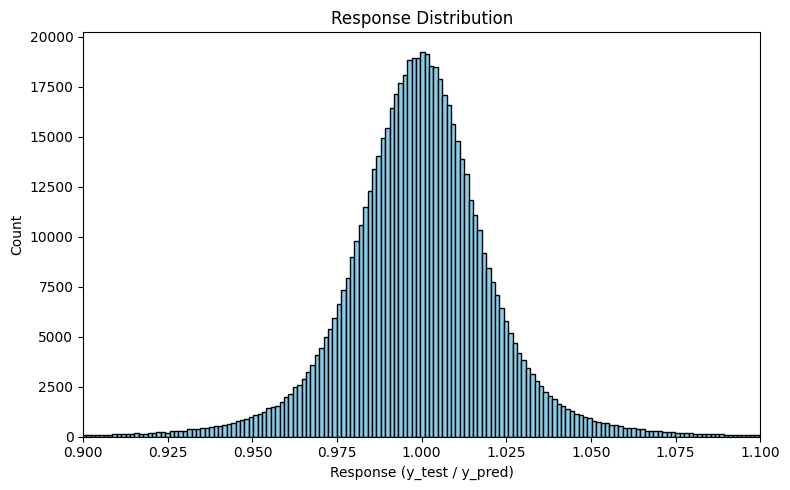

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(response, bins=10000, color='skyblue', edgecolor='black')
plt.xlabel('Response (y_test / y_pred)')
plt.ylabel('Count')
plt.xlim(0.9, 1.1)
plt.title('Response Distribution')
plt.tight_layout()
plt.show()

In [20]:
epsilon = 1e-8
response = y_test_np.flatten() / (y_pred_np.flatten() + epsilon)

# Optionally: restrict to reasonable range (truncate manually)
response = response[(response > 0.9) & (response < 1.1)]  # or whatever makes sense

In [21]:
def truncated_gaussian(x, mu, sigma, a, b):
    # a and b are bounds in standard normal units
    a_scaled = (a - mu) / sigma
    b_scaled = (b - mu) / sigma
    return truncnorm.pdf(x, a_scaled, b_scaled, loc=mu, scale=sigma)

In [22]:
# Histogram
from scipy.stats import truncnorm
from scipy.optimize import curve_fit
counts, bin_edges = np.histogram(response, bins=1000, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Fit
popt, _ = curve_fit(
    lambda x, mu, sigma: truncated_gaussian(x, mu, sigma, a=0.9, b=1.1),
    bin_centers, counts, p0=[1.0, 0.1]
)
mu_fit, sigma_fit = popt

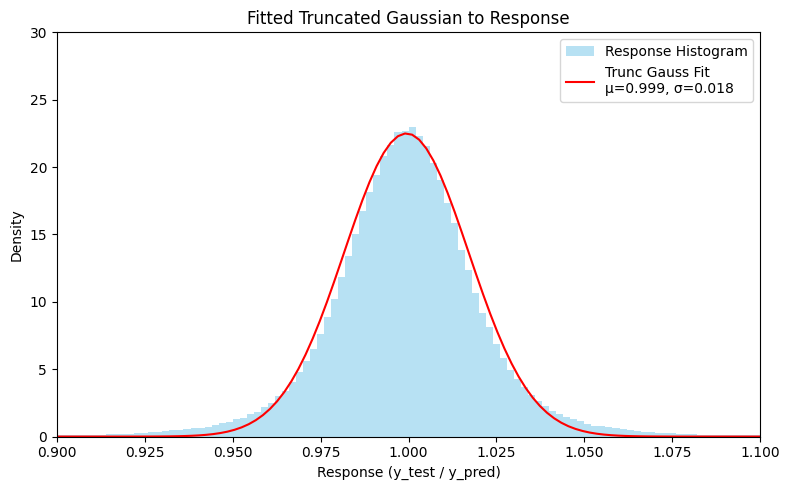

In [23]:
x_vals = np.linspace(0.9, 1.1, 100)
pdf_vals = truncated_gaussian(x_vals, mu_fit, sigma_fit, a=0.5, b=1.5)

plt.figure(figsize=(8, 5))
plt.hist(response, bins=100, density=True, color='skyblue', alpha=0.6, label='Response Histogram')
plt.plot(x_vals, pdf_vals, 'r-', label=f'Trunc Gauss Fit\nμ={mu_fit:.3f}, σ={sigma_fit:.3f}')
plt.xlabel('Response (y_test / y_pred)')
plt.xlim(0.9, 1.1)
plt.ylim(0, 30)
plt.ylabel('Density')
plt.title('Fitted Truncated Gaussian to Response')
plt.legend()
plt.tight_layout()
plt.show()

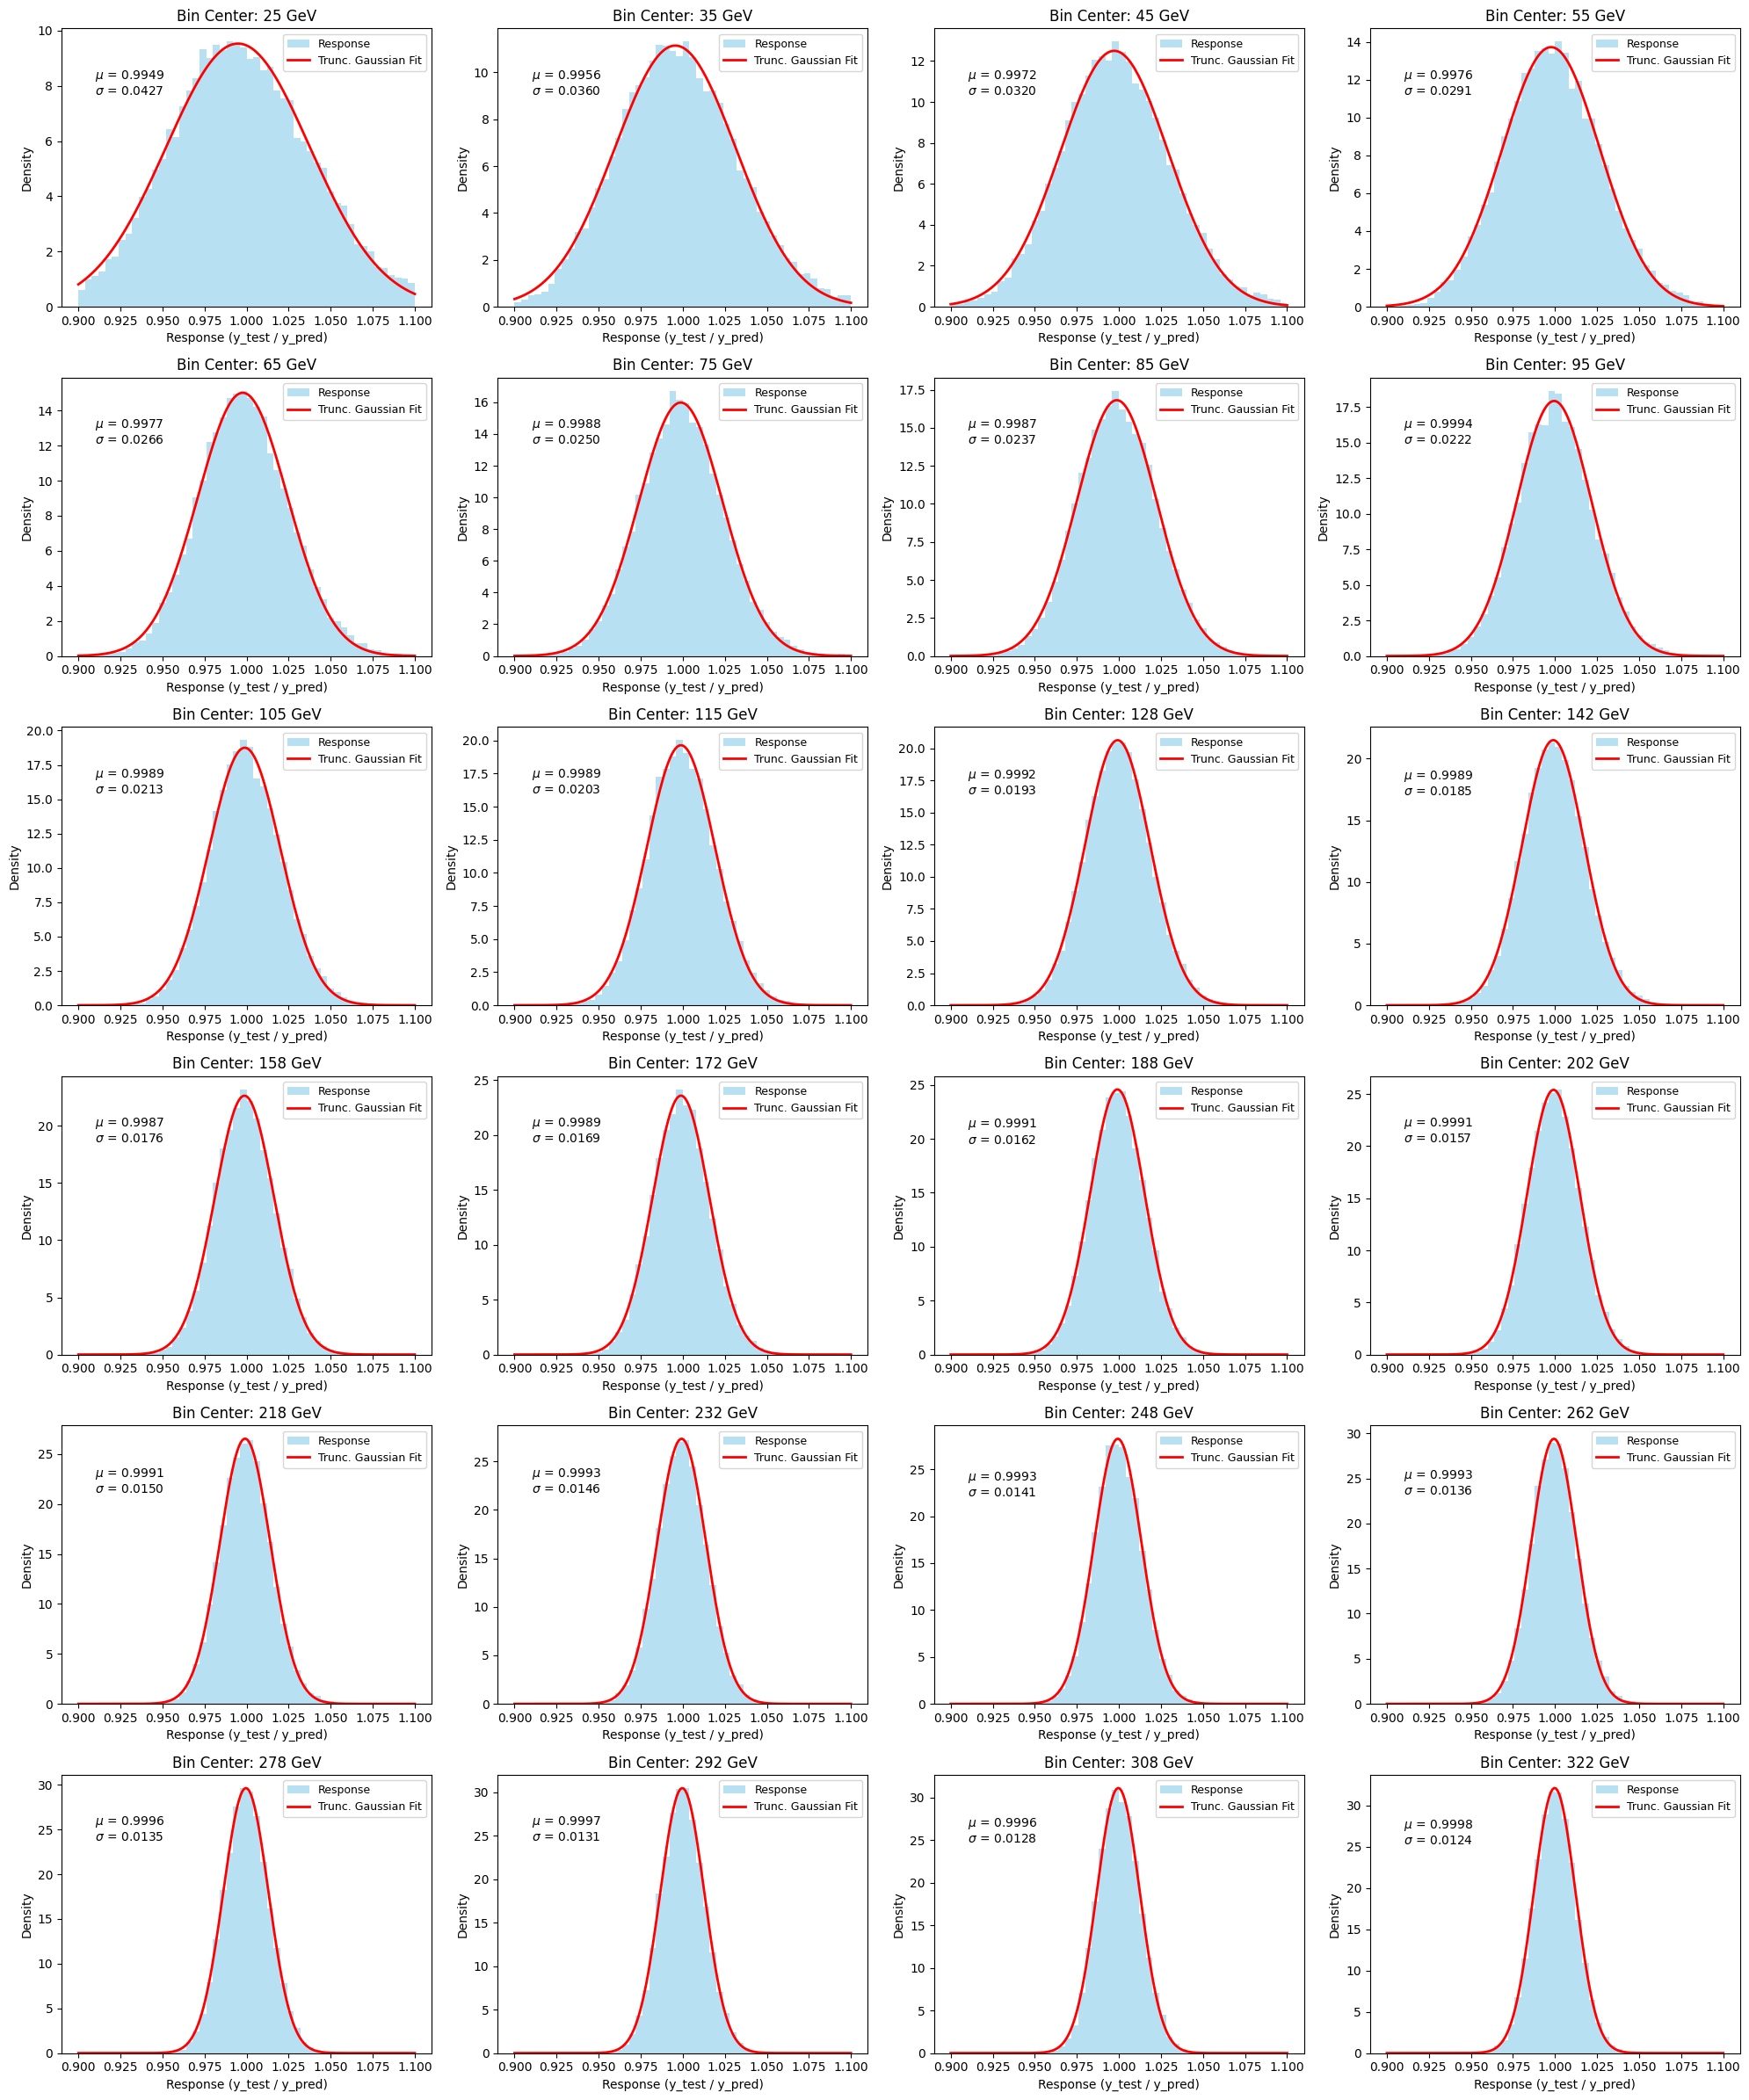

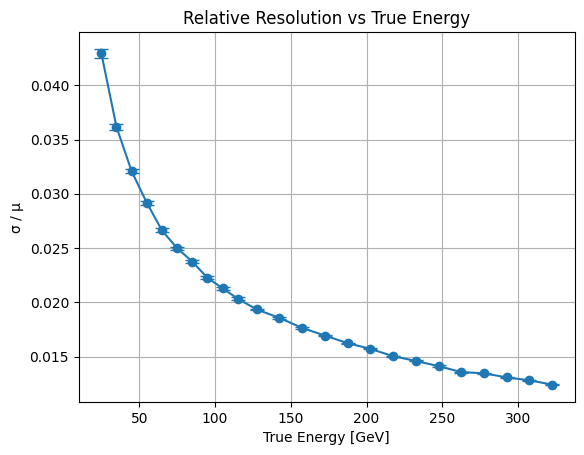

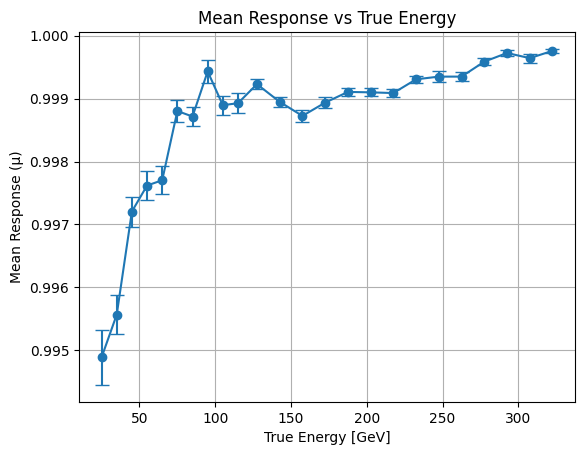

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from scipy.optimize import curve_fit

# Truncated Gaussian PDF
def truncated_gaussian(x, mu, sigma, a=0.9, b=1.1):
    a_, b_ = (a - mu) / sigma, (b - mu) / sigma
    return truncnorm.pdf(x, a_, b_, loc=mu, scale=sigma)

# Fit wrapper
def fit_func(x, mu, sigma):
    return truncated_gaussian(x, mu, sigma)

# Step 1: Prepare data
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test
y_pred_np = y_pred
y_test_np = y_test_np.flatten()
y_pred_np = y_pred_np.flatten()

# Step 2: Binning based on y_test
# bin_edges = np.arange(0, y_test_np.max()+10 , 10)


# bin_edges = np.arange(5, y_test_np.max() + 10, 10)

bin_edges = np.concatenate([
    np.arange(20, 120, 10),     # finer bins: 20, 25, 30, ..., 95
    np.arange(120, y_test_np.max() + 20, 15)  # coarser bins beyond 100 GeV
])

bin_edges = bin_edges[:-2]

bin_indices = np.digitize(y_test_np, bin_edges)

# Step 3: Containers
response_bins = []
bin_centers = []
mu_vals, sigma_vals, mu_errs, sigma_errs = [], [], [], []
epsilon = 1e-8

# Step 4: Fit truncated Gaussian per bin
for i in range(1, len(bin_edges)):
    indices = np.where(bin_indices == i)[0]
    if len(indices) < 10:
        continue

    y_test_bin = y_test_np[indices]
    y_pred_bin = y_pred_np[indices]
    response = y_test_bin / (y_pred_bin + epsilon)
    response_bins.append(response)
    center = (bin_edges[i - 1] + bin_edges[i]) / 2
    bin_centers.append(center)

    hist_vals, bin_edges_hist = np.histogram(response, bins=50, range=(0.9, 1.1), density=True)
    bin_centers_hist = 0.5 * (bin_edges_hist[1:] + bin_edges_hist[:-1])
    mu_guess = np.mean(response)
    sigma_guess = np.std(response)

    try:
        popt, pcov = curve_fit(fit_func, bin_centers_hist, hist_vals, p0=[mu_guess, sigma_guess])
        mu_fit, sigma_fit = popt
        mu_vals.append(mu_fit)
        sigma_vals.append(sigma_fit)
        mu_errs.append(np.sqrt(pcov[0, 0]))
        sigma_errs.append(np.sqrt(pcov[1, 1]))
    except Exception as e:
        print(f"Fit failed for bin {i}: {e}")
        continue

# Step 5: Plot all fits with tight layout
n_plots = len(response_bins)
n_cols = 4
n_rows = int(np.ceil(n_plots / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axs = axs.flatten() if n_plots > 1 else [axs]

for plot_idx in range(n_plots):
    ax = axs[plot_idx]
    response = response_bins[plot_idx]
    center = bin_centers[plot_idx]
    mu_fit = mu_vals[plot_idx]
    sigma_fit = sigma_vals[plot_idx]

    hist_vals, bin_edges_hist = np.histogram(response, bins=50, range=(0.9, 1.1), density=True)
    bin_centers_hist = 0.5 * (bin_edges_hist[1:] + bin_edges_hist[:-1])
    x_fit = np.linspace(0.9, 1.1, 200)

    ax.hist(response, bins=50, range=(0.9, 1.1), density=True, alpha=0.6, color='skyblue', label='Response')
    ax.plot(x_fit, truncated_gaussian(x_fit, mu_fit, sigma_fit), 'r-', lw=2, label='Trunc. Gaussian Fit')
    ax.set_title(f'Bin Center: {center:.0f} GeV')
    ax.set_xlabel("Response (y_test / y_pred)")
    ax.set_ylabel("Density")
    ax.text(0.91, np.max(hist_vals) * 0.8, f"$\\mu$ = {mu_fit:.4f}\n$\\sigma$ = {sigma_fit:.4f}", fontsize=10)
    ax.legend(fontsize=9)

# Hide unused subplots
for j in range(n_plots, len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()

# Step 6: Summary plots

# Convert lists to arrays
mu_vals = np.array(mu_vals)
sigma_vals = np.array(sigma_vals)
mu_errs = np.array(mu_errs)
sigma_errs = np.array(sigma_errs)
bin_centers = np.array(bin_centers)

# Calculate σ/μ and its uncertainty
sigma_over_mu = sigma_vals / mu_vals
sigma_over_mu_err = sigma_over_mu * np.sqrt((sigma_errs / sigma_vals)**2 + (mu_errs / mu_vals)**2)

# Plot σ/μ
plt.errorbar(bin_centers, sigma_over_mu, yerr=sigma_over_mu_err, fmt='o-', capsize=5)
plt.xlabel("True Energy [GeV]")
plt.ylabel("σ / μ")
plt.title("Relative Resolution vs True Energy")
plt.grid(True)
plt.show()

# Plot μ
plt.errorbar(bin_centers, mu_vals, yerr=mu_errs, fmt='o-', capsize=5)
plt.xlabel("True Energy [GeV]")
plt.ylabel("Mean Response (μ)")
plt.title("Mean Response vs True Energy")
plt.grid(True)
plt.show()

Stochastic term (S): 0.2159 ± 0.0005
Constant term (C):   0.0034 ± 0.0001


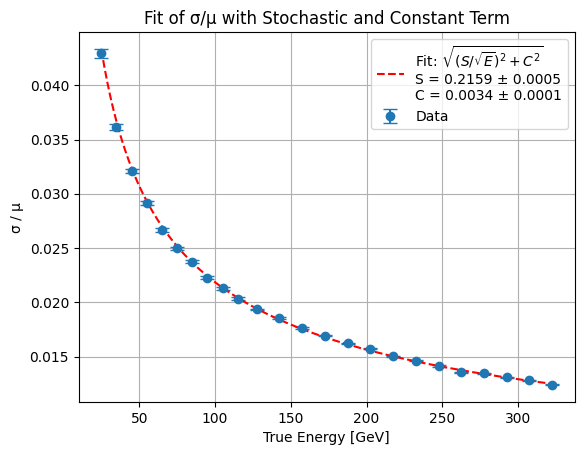

In [25]:
# Define fit function: sqrt( (S/sqrt(E))^2 + C^2 )
def resolution_model(E, S, C):
    return np.sqrt((S / np.sqrt(E))**2 + C**2)

# Initial guess: S = 0.3, C = 0.01
popt, pcov = curve_fit(resolution_model, bin_centers, sigma_over_mu,
                       sigma=sigma_over_mu_err, p0=[0.3, 0.01], absolute_sigma=True)

S_fit, C_fit = popt
S_err, C_err = np.sqrt(np.diag(pcov))

# Print results
print(f"Stochastic term (S): {S_fit:.4f} ± {S_err:.4f}")
print(f"Constant term (C):   {C_fit:.4f} ± {C_err:.4f}")

# Plot the fit over the data
E_plot = np.linspace(min(bin_centers), max(bin_centers), 300)
fit_curve = resolution_model(E_plot, S_fit, C_fit)

plt.errorbar(bin_centers, sigma_over_mu, yerr=sigma_over_mu_err, fmt='o', capsize=5, label='Data')
plt.plot(E_plot, fit_curve, 'r--', label=f'Fit: $\\sqrt{{(S/\\sqrt{{E}})^2 + C^2}}$\nS = {S_fit:.4f} ± {S_err:.4f}\nC = {C_fit:.4f} ± {C_err:.4f}')
plt.xlabel("True Energy [GeV]")
plt.ylabel("σ / μ")
plt.title("Fit of σ/μ with Stochastic and Constant Term")
plt.grid(True)
plt.legend()
plt.show()
